<a href="https://colab.research.google.com/github/cvaranasi1/NeuralNetworks_in_TensorFlow/blob/master/Copy_of_NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import Regularizer # Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

TensorFlow 2.x selected.


In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-02-07 23:20:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-02-07 23:20:39 (122 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(64, return_sequences=True))) # An LSTM Layer
model.add(Dropout(0.2)) # A dropout layer
model.add(Bidirectional(LSTM(64))) # Another LSTM Layer
model.add(Dense(64,activation='relu',bias_regularizer='Regularizer')) # A Dense Layer including regularizers)
model.add(Dense(total_words,activation='softmax')) # A Dense Layer
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 128)           66048     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              208715    
Total params: 587,339
Trainable params: 587,339
Non-trainable params: 0
________________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 11s 706us/sample - loss: 6.8970 - accuracy: 0.0224
Epoch 2/100
15462/15462 [==============================] - 7s 467us/sample - loss: 6.4953 - accuracy: 0.0261
Epoch 3/100
15462/15462 [==============================] - 7s 459us/sample - loss: 6.3585 - accuracy: 0.0329
Epoch 4/100
15462/15462 [==============================] - 7s 460us/sample - loss: 6.2492 - accuracy: 0.0367
Epoch 5/100
15462/15462 [==============================] - 7s 460us/sample - loss: 6.1515 - accuracy: 0.0374
Epoch 6/100
15462/15462 [==============================] - 7s 466us/sample - loss: 6.0370 - accuracy: 0.0407
Epoch 7/100
15462/15462 [==============================] - 7s 463us/sample - loss: 5.9264 - accuracy: 0.0449
Epoch 8/100
15462/15462 [==============================] - 7s 457us/sample - loss: 5.8299 - accuracy: 0.0464
Epoch 9/100
15462/15462 [==============================] - 7s 470us/sample - loss: 5.7352 - accuracy: 0.

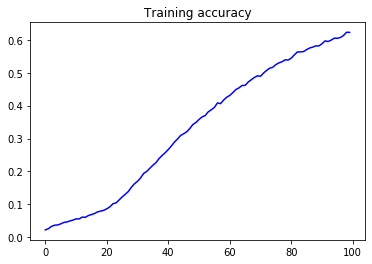

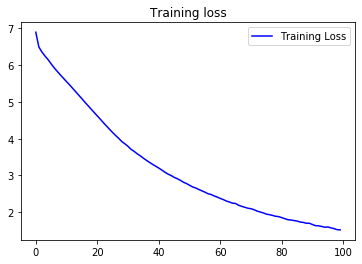

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope old is ground change it due to it that that so live so know i know i lose a tomb the heart sheds end weep dearer ' ' this ' rolling rolling ' ' livery sharpen'd staineth ' this treasure me date 'will ' ' due thee room thee room due me that that that that thee so say it bring a verse can near head shown ' wrong ' staineth level with my 'will ' ' dearer cross ' walk ask'd ' ' this 'no ' ' due me torn due me her view level with true heart truth
